In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
# Import the data

data = pd.read_csv("C:/Users/ronit/OneDrive/Ronit/Machine Learning/Projects/Regression/My Project/Data/city_day.csv")
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
# Converting the date column 'dt' from str to date format
 
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [6]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Cleaning the data, handling the missing values

In [7]:
# Missing Values

data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

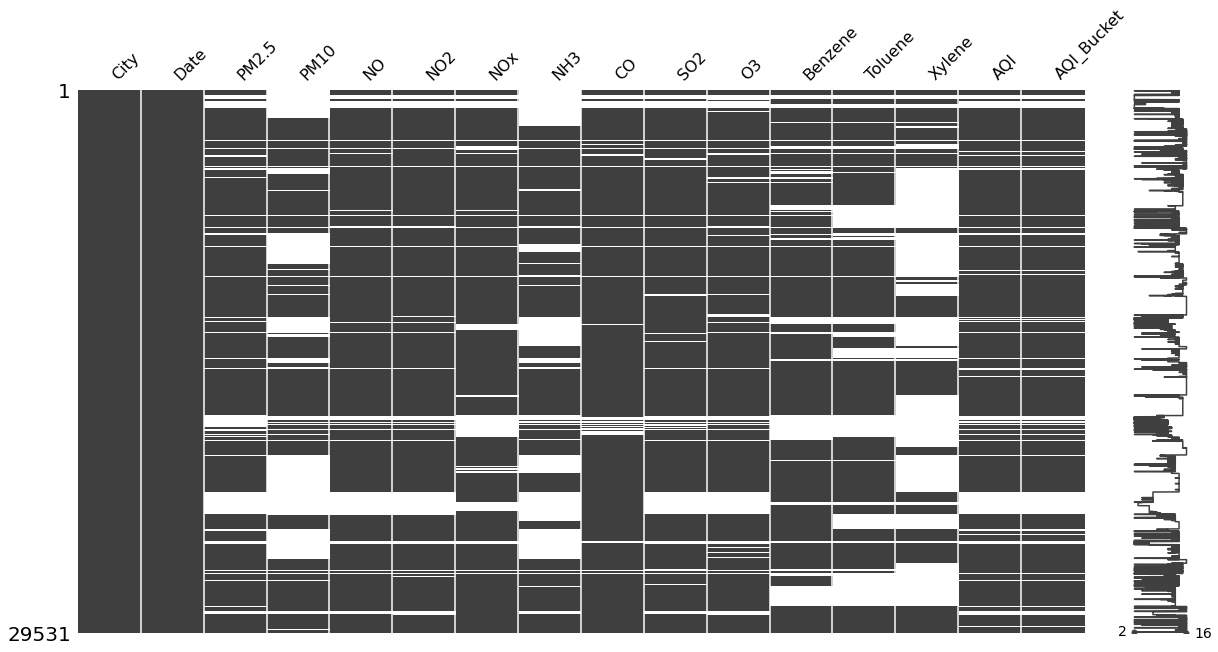

In [8]:
# Visualizing the missing data

missingno.matrix(data, figsize = (20,10))

In [9]:
# Subsetting the missing data

data_new = data.iloc[:, 2:15]
data_new

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [11]:
# FIlling the missing values using the Imputer function

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
data_new1 = imputer.fit_transform(data_new)
data_new1 = pd.DataFrame(data_new1, columns = ("PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene", "AQI"))
data_new1["Date"] = data["Date"]
data_new1["City"] = data["City"]
data_new1["AQI_Bucket"] = data["AQI_Bucket"]
data_new1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Date,City,AQI_Bucket
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,2015-01-01,Ahmedabad,NaN
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,2015-01-02,Ahmedabad,NaN
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,2015-01-03,Ahmedabad,NaN
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,2015-01-04,Ahmedabad,NaN
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,2015-01-05,Ahmedabad,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,2020-06-27,Visakhapatnam,Good
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,2020-06-28,Visakhapatnam,Satisfactory
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,2020-06-29,Visakhapatnam,Satisfactory
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,2020-06-30,Visakhapatnam,Satisfactory


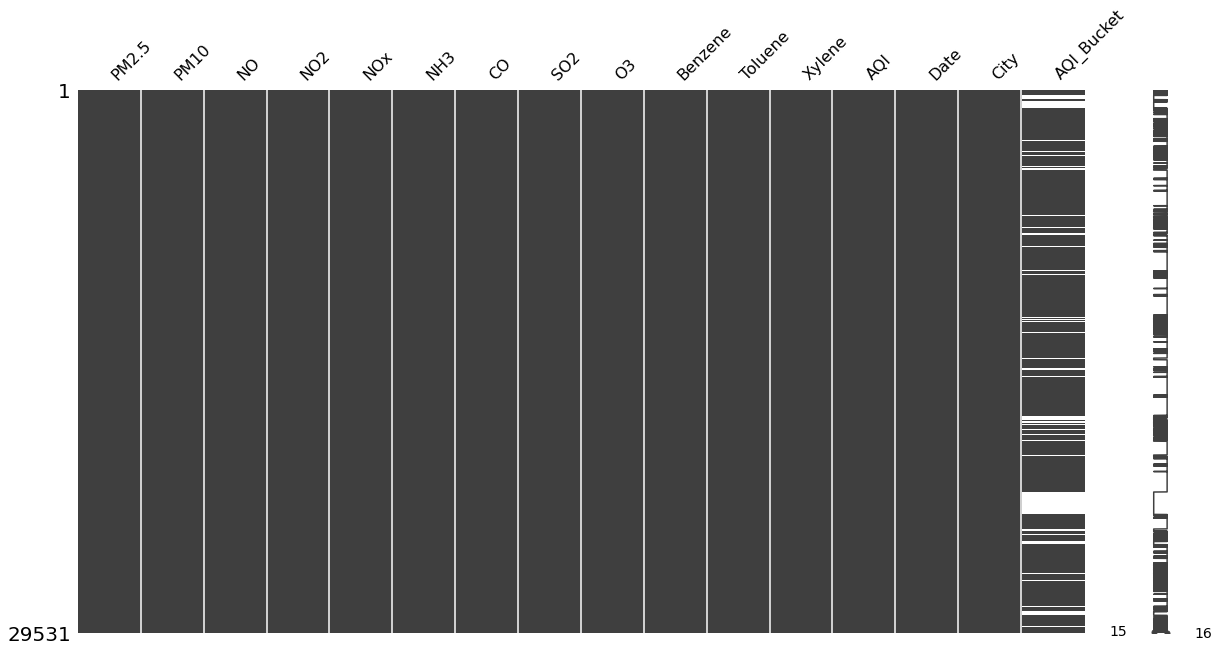

In [12]:
# Visualizing the missing data

missingno.matrix(data_new1, figsize = (20,10))

# No more missing values  

In [13]:
data_new1.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Exploratory Data Analysis

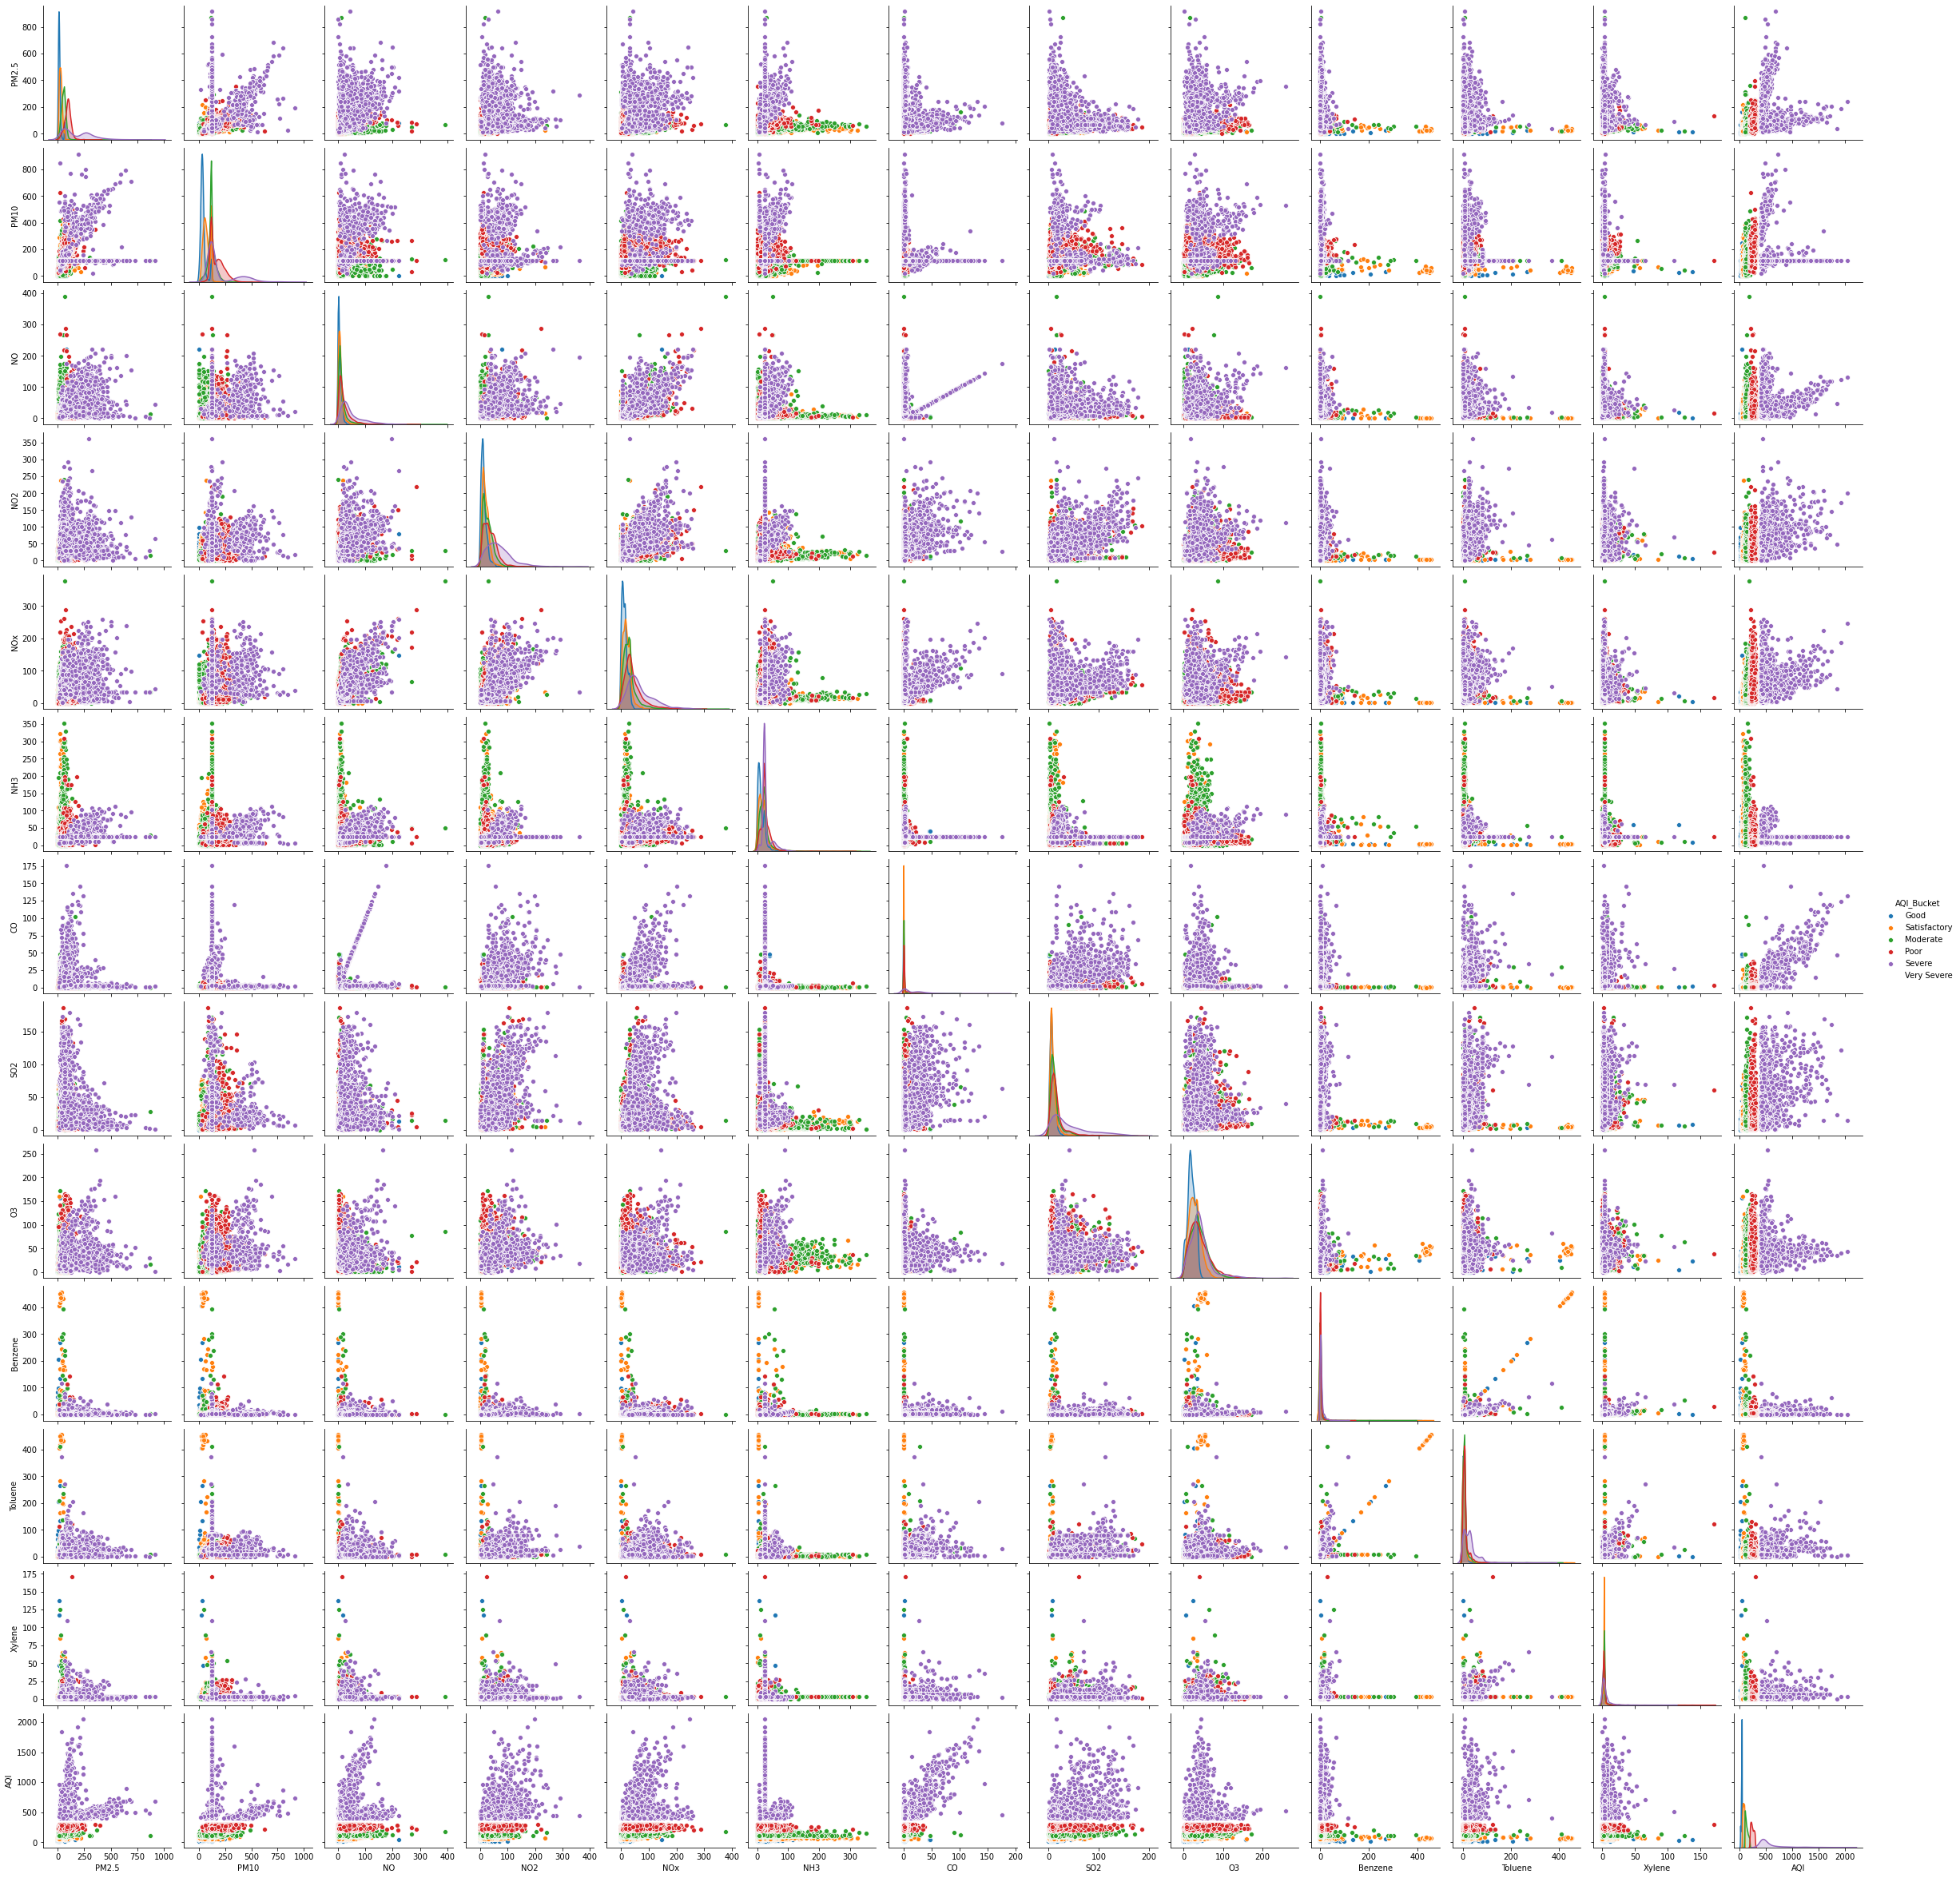

In [14]:
sns.pairplot(data_new1, kind = "scatter", hue = "AQI_Bucket", hue_order = ["Good", "Satisfactory", "Moderate", "Poor", "Severe", "Very Severe"])

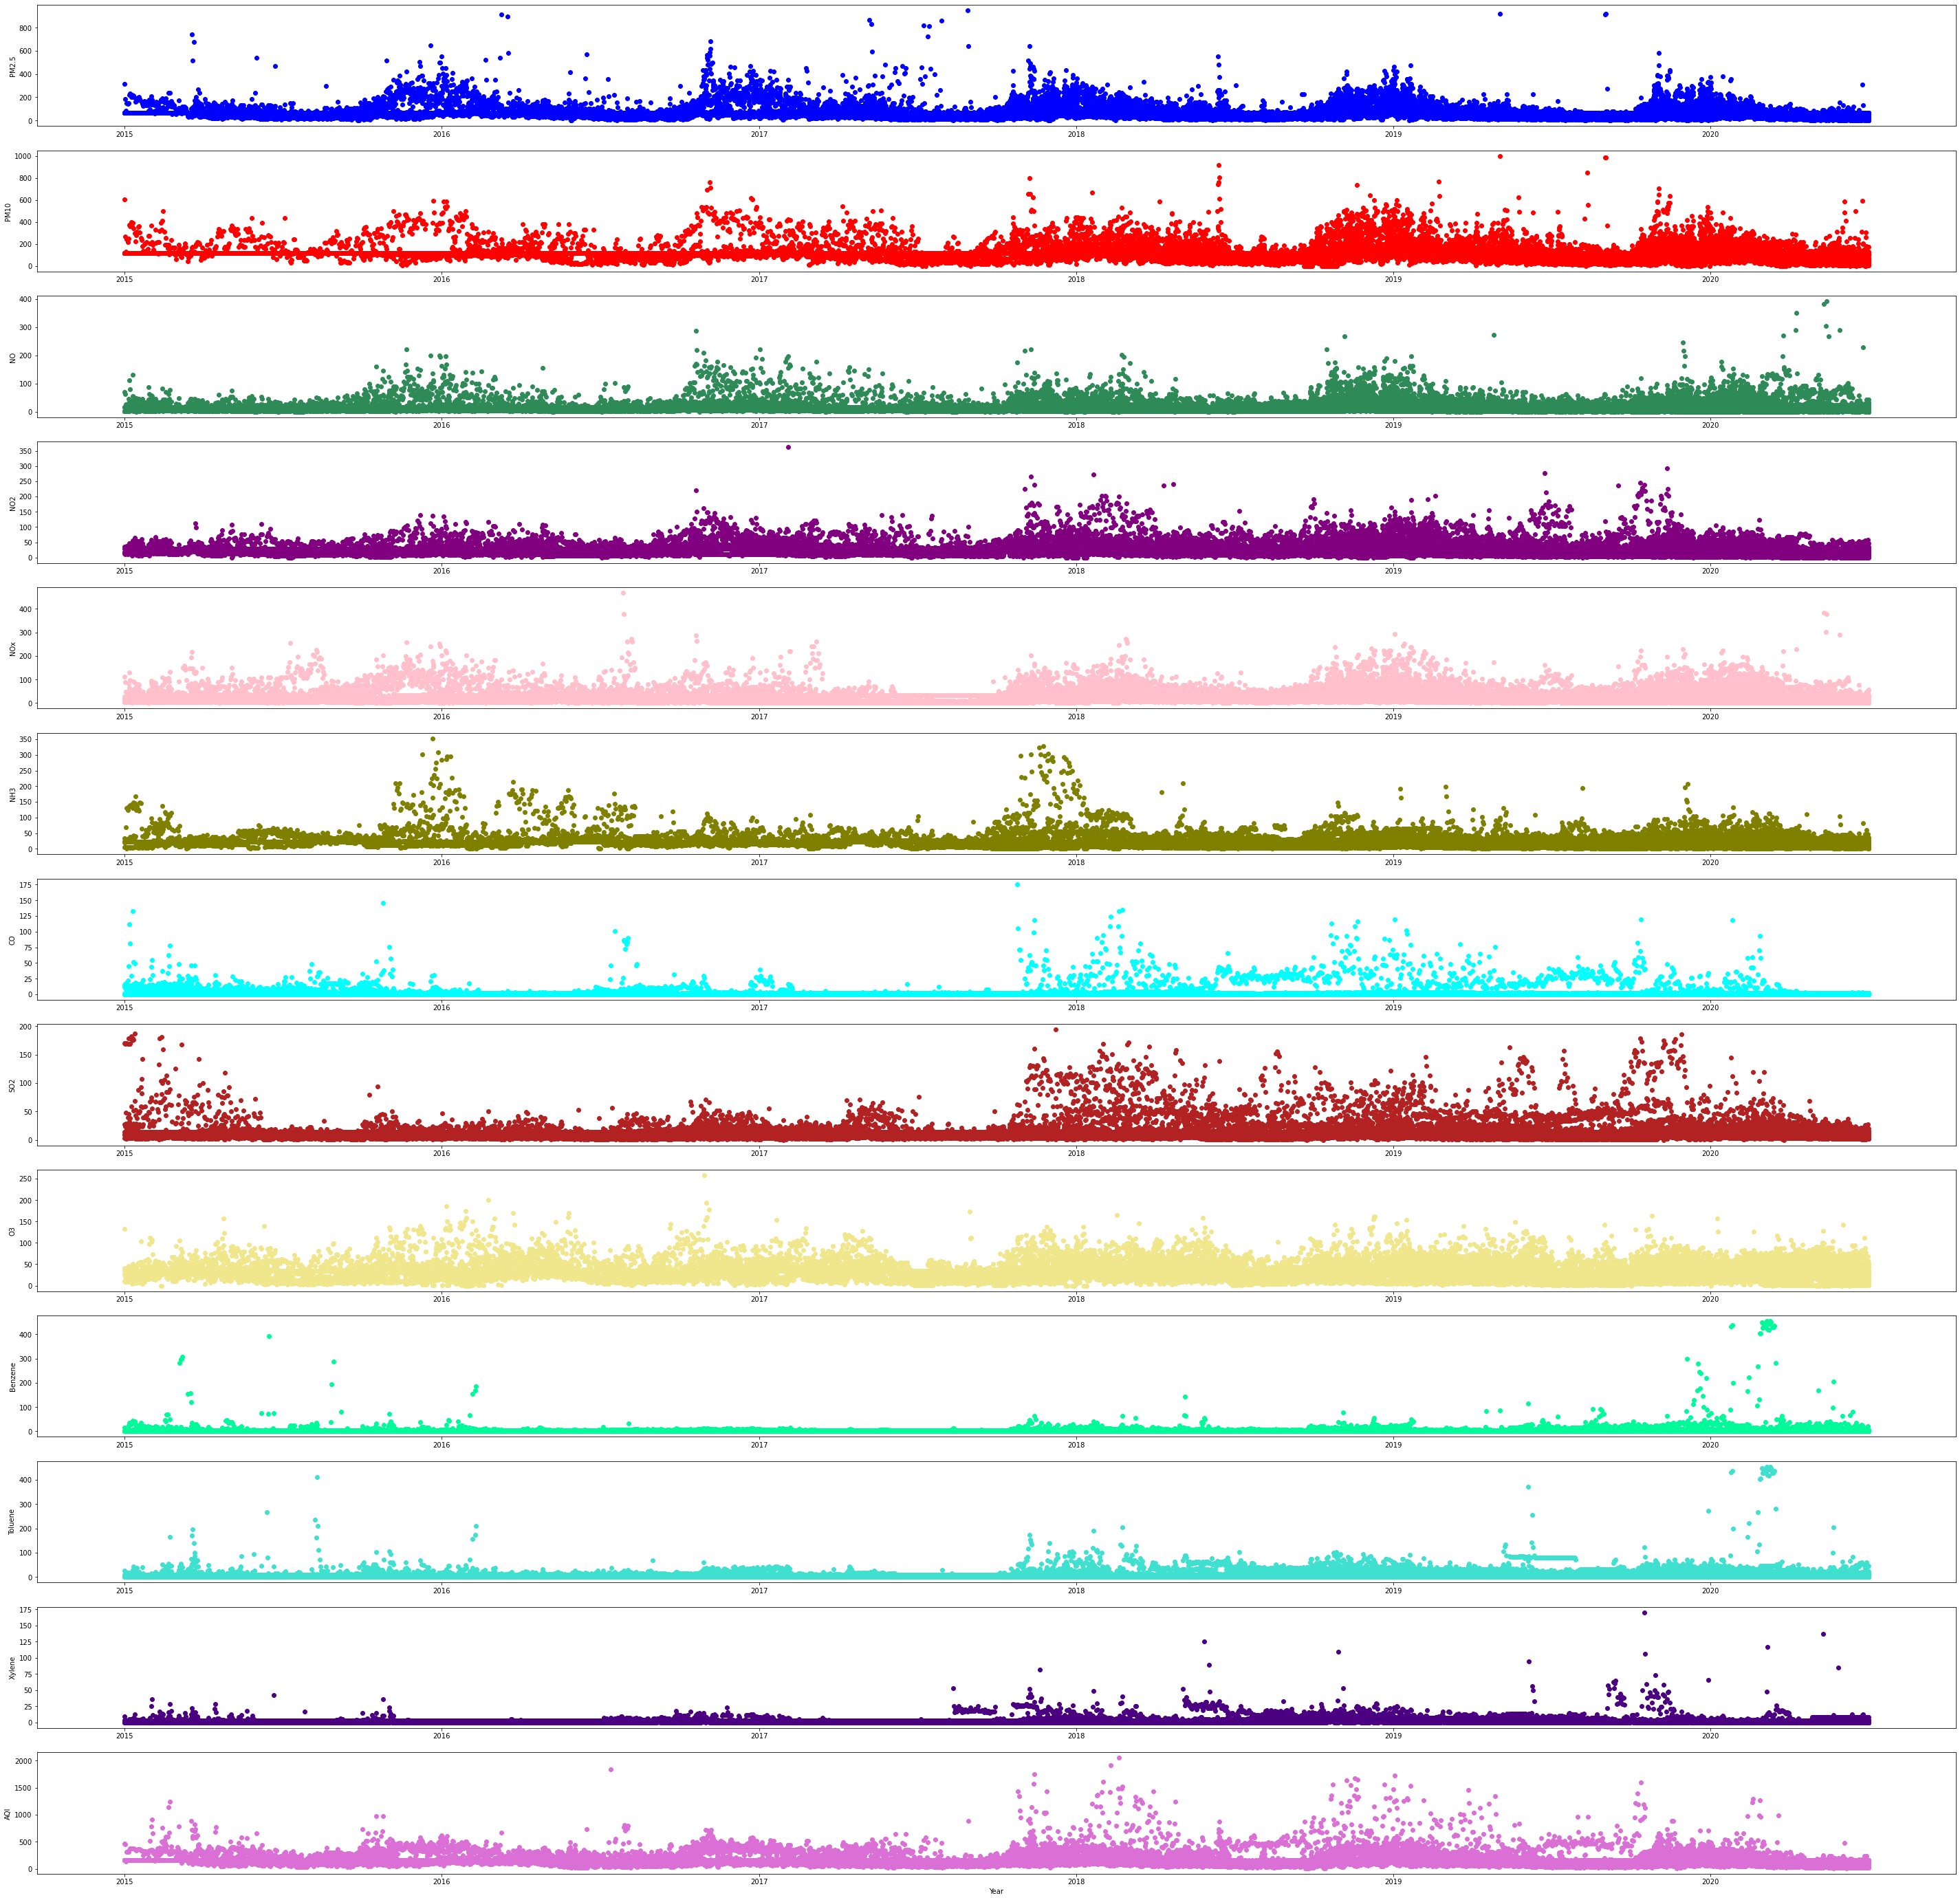

In [15]:
# Visualizing the data across their timeline

fig, ax = plt.subplots(13, 1, figsize = (50,50))

ax[0].scatter(data_new1["Date"], data_new1["PM2.5"], color='b')
ax[1].scatter(data_new1["Date"], data_new1["PM10"],color='r')
ax[2].scatter(data_new1["Date"], data_new1["NO"],color='seagreen')
ax[3].scatter(data_new1["Date"], data_new1["NO2"],color='purple')
ax[4].scatter(data_new1["Date"], data_new1["NOx"],color='pink')
ax[5].scatter(data_new1["Date"], data_new1["NH3"],color='olive')
ax[6].scatter(data_new1["Date"], data_new1["CO"],color='cyan')
ax[7].scatter(data_new1["Date"], data_new1["SO2"],color='firebrick')
ax[8].scatter(data_new1["Date"], data_new1["O3"],color='khaki')
ax[9].scatter(data_new1["Date"], data_new1["Benzene"],color='mediumspringgreen')
ax[10].scatter(data_new1["Date"], data_new1["Toluene"],color='turquoise')
ax[11].scatter(data_new1["Date"], data_new1["Xylene"],color='indigo')
ax[12].scatter(data_new1["Date"], data_new1["AQI"],color='orchid')

ax[0].set_ylabel("PM2.5")
ax[1].set_ylabel("PM10")
ax[2].set_ylabel("NO")
ax[3].set_ylabel("NO2")
ax[4].set_ylabel("NOx")
ax[5].set_ylabel("NH3")
ax[6].set_ylabel("CO")
ax[7].set_ylabel("SO2")
ax[8].set_ylabel("O3")
ax[9].set_ylabel("Benzene")
ax[10].set_ylabel("Toluene")
ax[11].set_ylabel("Xylene")
ax[12].set_ylabel("AQI")
ax[12].set_xlabel("Year")

plt.show()

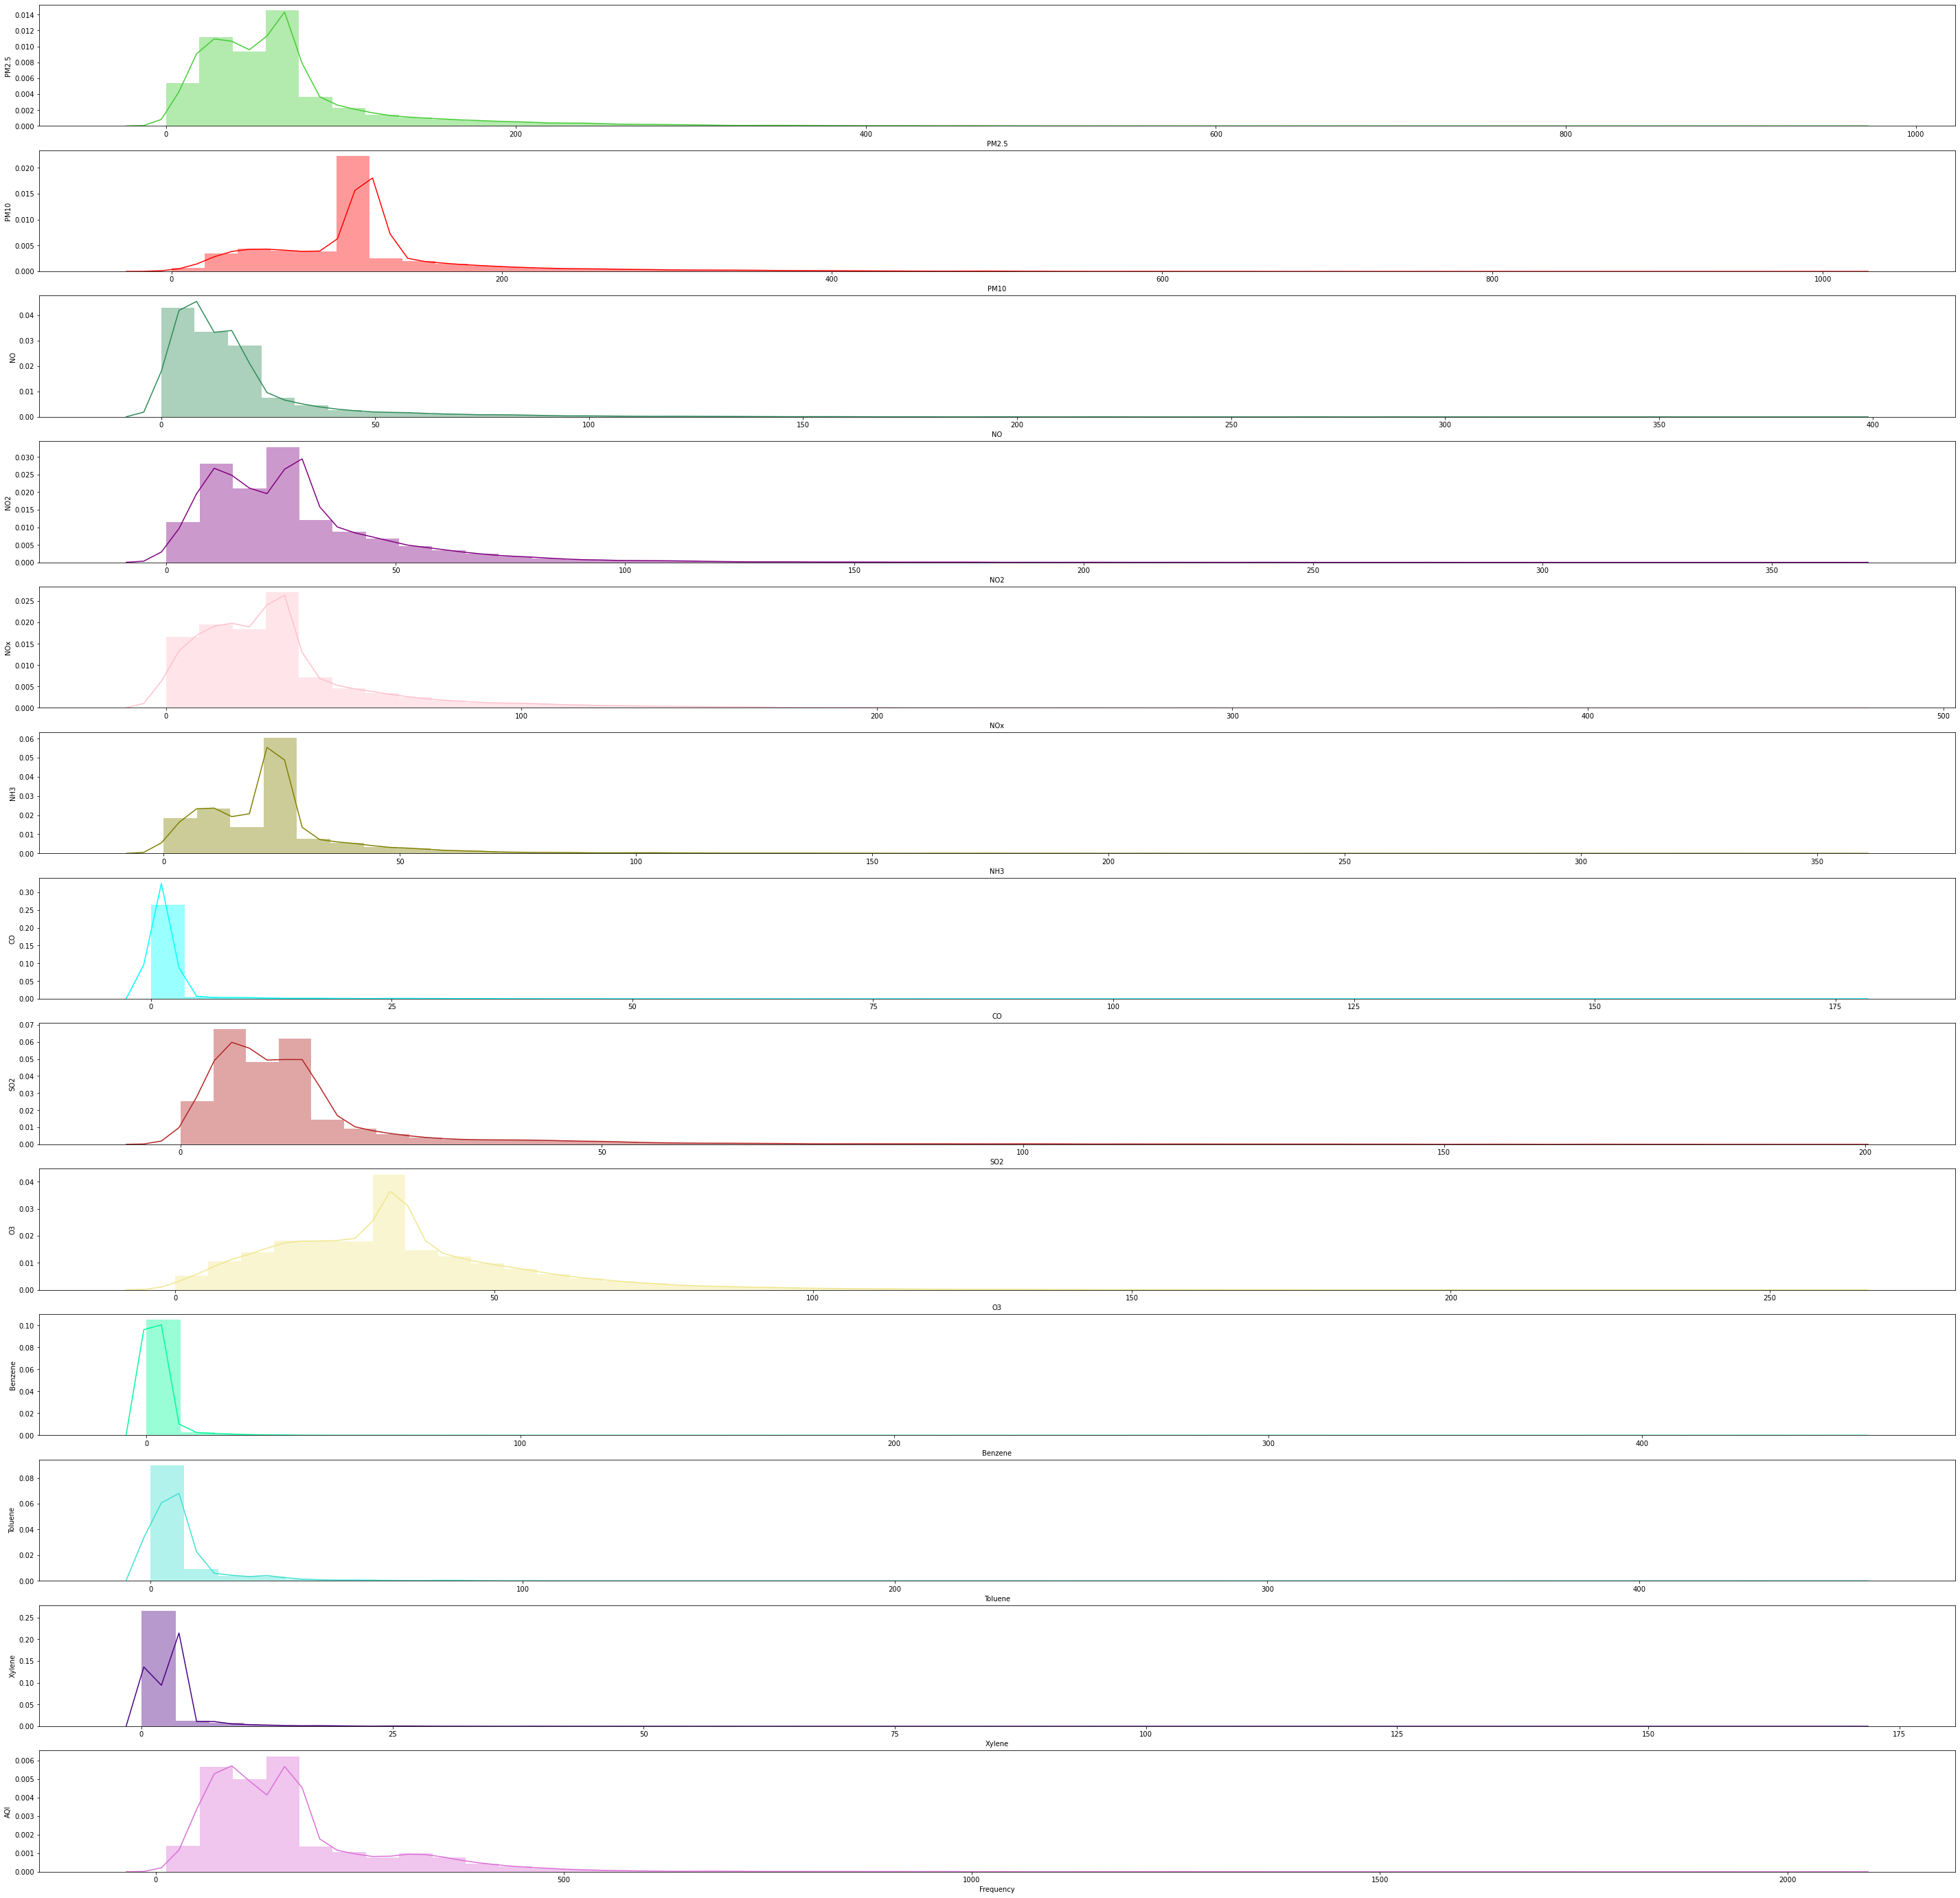

In [16]:
# Visualizing the frequency of the concentrations of the gases on different dates


fig, ax = plt.subplots(13, 1, figsize = (50,50))

#ax[0] = sns.distplot(data_new1["PM2.5"], color='b')
sns.distplot(data_new1["PM2.5"], color="#43cc34", ax=ax[0])
sns.distplot(data_new1["PM10"], color="r", ax=ax[1])
sns.distplot(data_new1["NO"], color="seagreen", ax=ax[2])
sns.distplot(data_new1["NO2"], color="purple", ax=ax[3])
sns.distplot(data_new1["NOx"], color="pink", ax=ax[4])
sns.distplot(data_new1["NH3"], color="olive", ax=ax[5])
sns.distplot(data_new1["CO"], color="cyan", ax=ax[6])
sns.distplot(data_new1["SO2"], color="firebrick", ax=ax[7])
sns.distplot(data_new1["O3"], color="khaki", ax=ax[8])
sns.distplot(data_new1["Benzene"], color="mediumspringgreen", ax=ax[9])
sns.distplot(data_new1["Toluene"], color="turquoise", ax=ax[10])
sns.distplot(data_new1["Xylene"], color="indigo", ax=ax[11])
sns.distplot(data_new1["AQI"], color="orchid", ax=ax[12])


ax[0].set_ylabel("PM2.5")
ax[1].set_ylabel("PM10")
ax[2].set_ylabel("NO")
ax[3].set_ylabel("NO2")
ax[4].set_ylabel("NOx")
ax[5].set_ylabel("NH3")
ax[6].set_ylabel("CO")
ax[7].set_ylabel("SO2")
ax[8].set_ylabel("O3")
ax[9].set_ylabel("Benzene")
ax[10].set_ylabel("Toluene")
ax[11].set_ylabel("Xylene")
ax[12].set_ylabel("AQI")
ax[12].set_xlabel("Frequency")

plt.show()

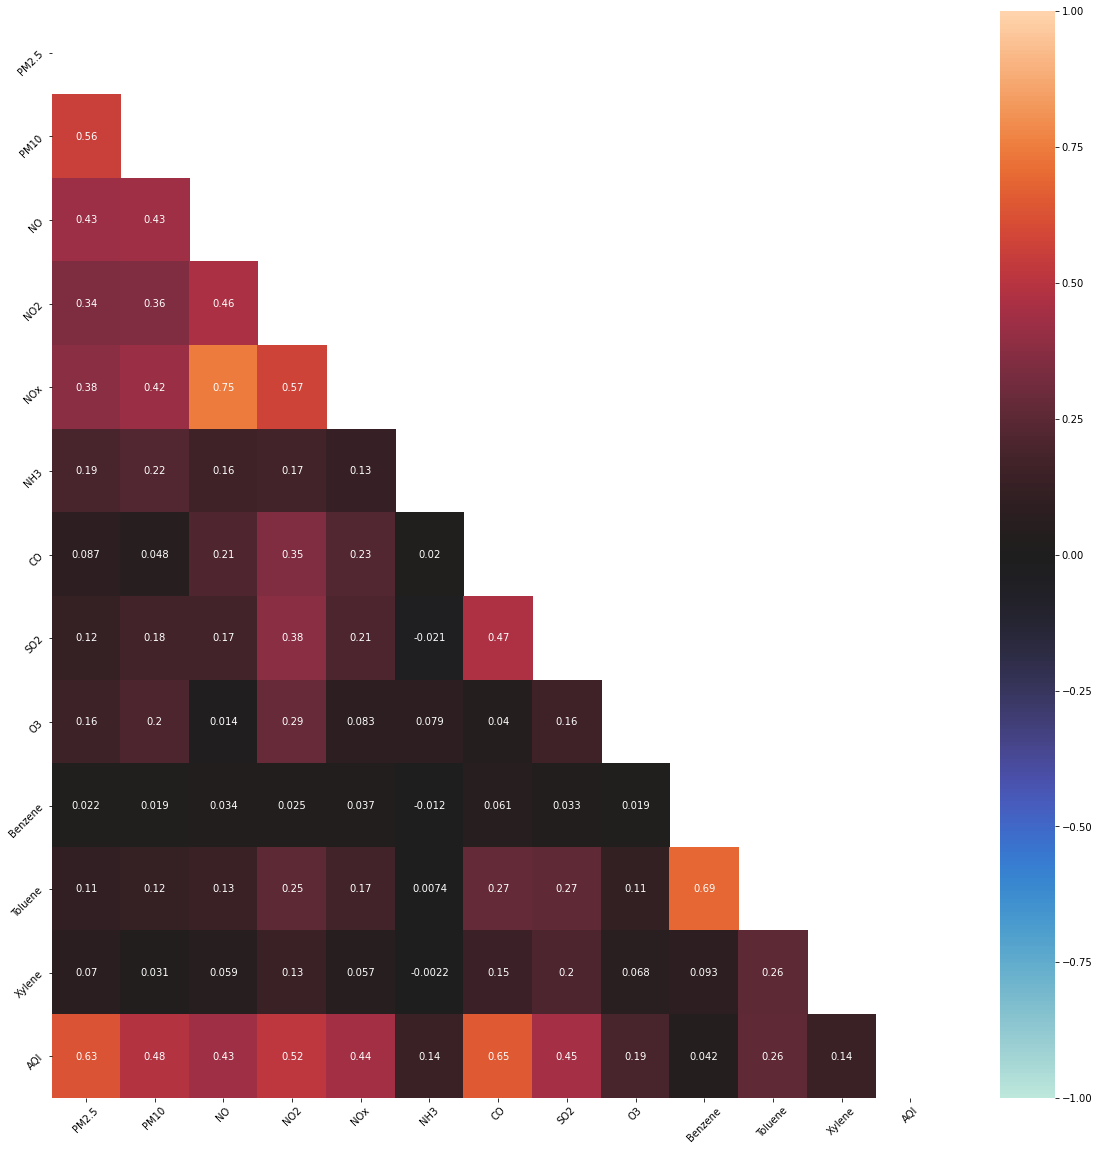

In [17]:
# Plotting the Correlation Matrix

fig, ax = plt.subplots(figsize=(20, 20))
corrMatrix = data_new1.corr()

matrix = np.triu(corrMatrix)

sns.heatmap(corrMatrix, annot=True, mask = matrix, vmin=-1, vmax=1, center= 0)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [18]:
data_delhi = data[data_new1["City"] == "Delhi"]
data_delhi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


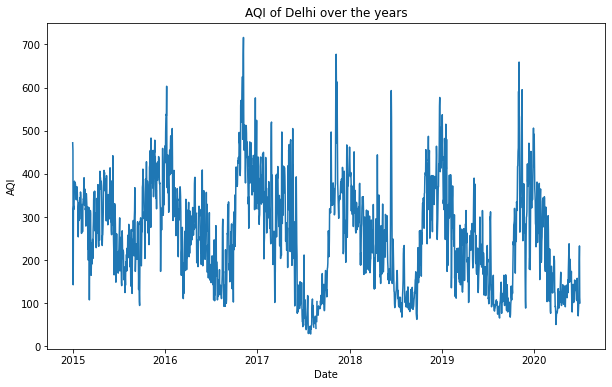

In [28]:
#Visualizing the AQI of the city Delhi over the years


plt.figure(figsize=(10, 6))
plt.plot(data_delhi["Date"], data_delhi["AQI"])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI of Delhi over the years")
plt.show()

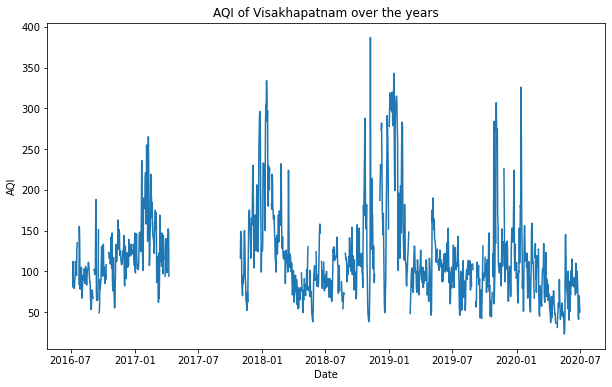

In [29]:
#Visualizing the AQI of the city Visakhapatnam over the years

data_visakhapatnam = data[data_new1["City"] == "Visakhapatnam"]
plt.figure(figsize=(10, 6))
plt.plot(data_visakhapatnam["Date"], data_visakhapatnam["AQI"])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI of Visakhapatnam over the years")
plt.show()

#                                        Linear Regression Analysis

In [30]:
# Creating X and y

X = data_new1['CO'] #Choosing CO as the Input Variable as it has the highest correlation with the target variable AQI i.e. 0.65
y = data_new1['AQI'] # Air Quality Index has been chosen as the target variable

# Splitting the varaibles as training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100)

In [31]:
X_train

25050     1.100000
25656     0.430000
19352     0.860000
286      18.120000
531       2.248598
           ...    
12119     0.810000
24423     1.860000
14147     1.150000
23320     2.760000
5640      0.750000
Name: CO, Length: 20671, dtype: float64

In [32]:
y_train

25050    123.000000
25656    109.000000
19352    286.000000
286      370.000000
531      166.463581
            ...    
12119    112.000000
24423    340.000000
14147    202.000000
23320    180.000000
5640      63.000000
Name: AQI, Length: 20671, dtype: float64

In [35]:
# Adding a column to X_train and X_test to perform regression properly

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

(20671, 1)
(8860, 1)


In [42]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("The value of the Intercept :",lreg.intercept_)
print('The value of the Slope :',lreg.coef_)

The value of the Intercept : 138.22474318231258
The value of the Slope : [12.35078407]


In [58]:
# Making Predictions of y_value

y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

# Comparing the r2 value of both train and test data
# Importing r2_square

from sklearn.metrics import r2_score
print("The R-squared values on the training data is: {}".format(r2_score(y_train,y_train_pred)))
print("The R-squared values on the test data is: {}".format(r2_score(y_test,y_test_pred)))

The R-squared values on the training data is: 0.42552368111030103
The R-squared values on the test data is: 0.41397117284171536


# As the R² value on test data is within 5% of the R² value on training data, the model can be applied to new test sets in the future

In [81]:
# Evaluating the model by calculating the differences between the predicted and observed values

from sklearn import metrics
print("The Mean Absolute Error is :{}".format(metrics.mean_absolute_error(y_test,y_test_pred)))
print("The Mean Squared Error is :{}".format(metrics.mean_squared_error(y_test,y_test_pred)))
print("The Root Mean Squared Error is :{}".format(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))))

The Mean Absolute Error is :69.6206931138153
The Mean Squared Error is :9878.259036304997
The Root Mean Squared Error is :99.38943121029014


# Residuals Analysis

In [68]:
# Creating residuals from the y_train data and predicted y_data

res = (y_train - y_train_pred)

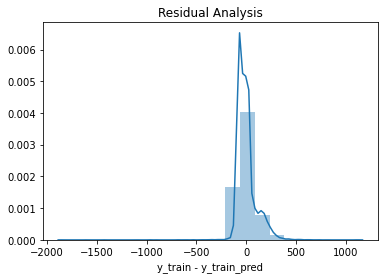

In [73]:
# Plotting the histogram using the residual values

fig = plt.figure()
sns.distplot(res, bins = 20)
plt.title('Residual Analysis')
plt.xlabel('y_train - y_train_pred')
plt.show()

# Residuals seem to be normally distributed

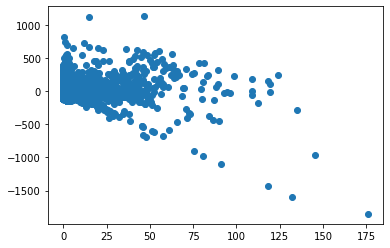

In [70]:
# Looking for any patterns in the residuals

plt.scatter(X_train,res)
plt.show()

# Residuals seem to be scattered at random at beginning and then show a downwards trend

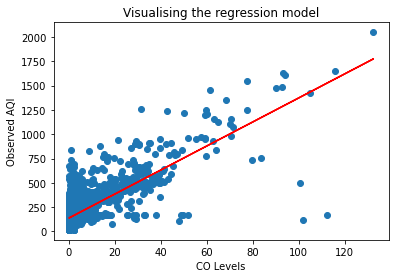

In [75]:
# Visualising the regressed line on the Test Set

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel("CO Levels")
plt.ylabel("Observed AQI")
plt.title("Visualising the regression model")
plt.show()

# The End!
# Made by: Ronit Choudhury
# https://github.com/ronitch